# Exploratory Data Analysis – Breast Cancer Coimbra Dataset

This notebook performs exploratory data analysis (EDA) on the **Breast Cancer Coimbra** dataset.

- Goal: Explore clinical / metabolic features and their relationship with breast cancer status.
- Target variable: `Classification`
  - 0 = Healthy / Control
  - 1 = Patient / Malignant

This analysis includes:
1. Data loading and basic checks
2. Univariate analysis (distributions & summary statistics)
3. Bivariate analysis (feature vs target)
4. Correlation analysis
5. Outlier inspection
6. Scaling exploration
7. Simple feature-importance measures

More details and interpretations will be noted on later sections at where the corrisponding data was been extracted. A final summery is noted at the end as well.

In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## 1. Dataset Overview

### **Shape & Columns**
- **Rows:** 4,000  
- **Feature columns:** Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1  
- **Target:** `Classification` (0 or 1)

### **Data Types**
All 9 features are numerical (`int64` or `float64`) and fully non-null.  
No missing values were detected in any column.

### **Class Distribution**
| Class | Count | Proportion |
|-------|--------|------------|
| **0 – Healthy** | 1784 | 44.6% |
| **1 – Patient** | 2216 | 55.4% |

The dataset shows a **slight class imbalance**, with more patient samples than healthy ones.

A count plot confirms this visually.


In [5]:
#Load data
# Update the path if needed
df = pd.read_csv(r'D:\learning UCSD\ece143\Group_Project\breast_cancer_coimbra_cleaned.csv')
print("Shape:", df.shape)


Shape: (4000, 10)


In [4]:
print("DataFrame Info:")
print(df.info())
print("\nSummary statistics:")
display(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4000 non-null   int64  
 1   BMI             4000 non-null   float64
 2   Glucose         4000 non-null   int64  
 3   Insulin         4000 non-null   float64
 4   HOMA            4000 non-null   float64
 5   Leptin          4000 non-null   float64
 6   Adiponectin     4000 non-null   float64
 7   Resistin        4000 non-null   float64
 8   MCP.1           4000 non-null   float64
 9   Classification  4000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 312.6 KB
None

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Age,4000.0,56.210750,17.809650,32.000000,39.000000,56.000000,72.000000,85.000000
BMI,4000.0,27.422280,4.413884,20.690751,23.079053,27.558485,30.814916,36.209606
Glucose,4000.0,113.876500,25.837795,76.000000,76.000000,131.000000,134.000000,138.000000
Insulin,4000.0,8.654001,6.435160,2.821000,4.421750,5.818000,10.466250,30.211000
HOMA,4000.0,2.024332,1.625638,0.590033,0.970090,1.373842,2.502776,8.218456
Leptin,4000.0,25.137737,15.096446,6.831900,12.712750,19.805050,36.670250,68.506600
Adiponectin,4000.0,9.364896,4.674244,3.192272,5.580210,8.286938,10.918292,22.536919
Resistin,4000.0,13.053667,7.454424,4.190320,7.022095,10.692780,17.294747,42.617810
MCP.1,4000.0,512.183456,253.279015,137.488000,299.665000,482.308000,691.312500,1227.250000
Classification,4000.0,0.554000,0.497138,0.000000,0.000000,1.000000,1.000000,1.000000



Missing values per column:
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [10]:
TARGET_COL = "Classification"
feature_cols = [col for col in df.columns if col != TARGET_COL]

print("Target column:", TARGET_COL)
print("Feature columns:", feature_cols)


class_counts = df[TARGET_COL].value_counts().sort_index()
print("\nClass distribution:")
print(class_counts)

class_proportions = class_counts / len(df)
print("\nClass proportions:")
print(class_proportions)


Target column: Classification
Feature columns: ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

Class distribution:
Classification
0    1784
1    2216
Name: count, dtype: int64

Class proportions:
Classification
0    0.446
1    0.554
Name: count, dtype: float64


## 2. Univariate Feature Distributions

Histograms and KDE curves were generated for each feature.

### **Key Observations**
- **Age:** Broad distribution centered around ~56 years.  
- **BMI:** Range ~21–36, mild multimodality.  
- **Glucose:** Clearly **bimodal** with peaks around 76 and 131 mg/dL.  
- **Insulin, HOMA, Resistin:** Strong **right skew** with long tails.  
- **Leptin and Adiponectin:** Mild right skew.

### **Interpretation**
Several metabolic markers show skewed distributions, suggesting that  
**log-transforms or robust scaling** may help stabilize variance in modeling.

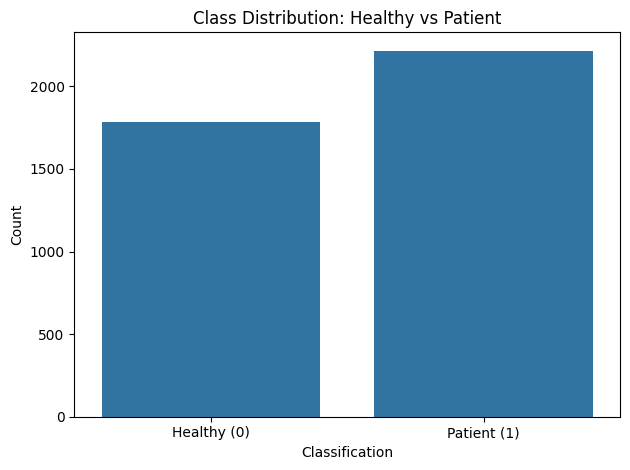

In [30]:
fig, ax = plt.subplots()
sns.countplot(x=TARGET_COL, data=df, ax=ax)
ax.set_xticks([0, 1]) 
ax.set_xticklabels(["Healthy (0)", "Patient (1)"])
ax.set_title("Class Distribution: Healthy vs Patient")
ax.set_xlabel("Classification")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


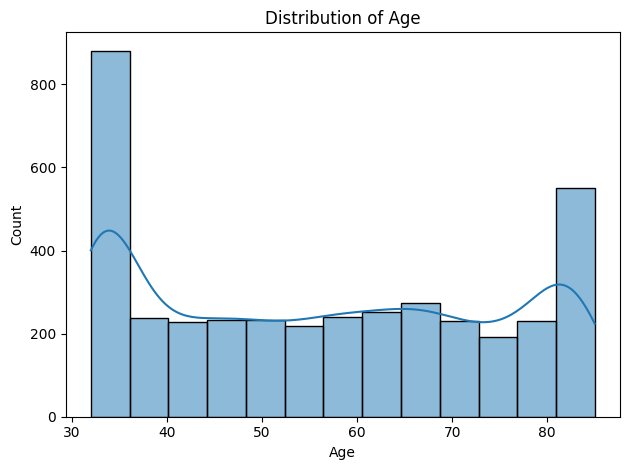

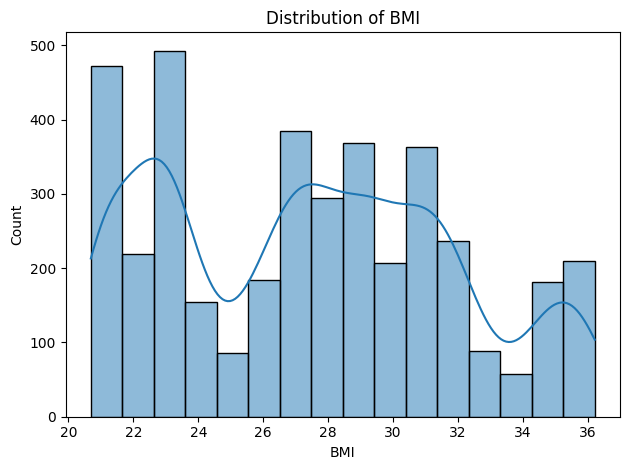

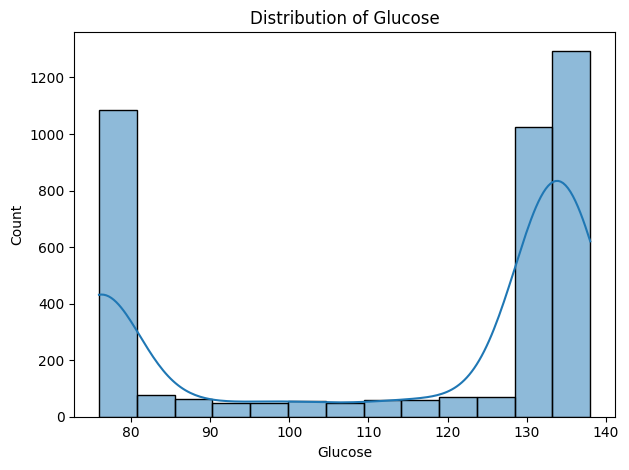

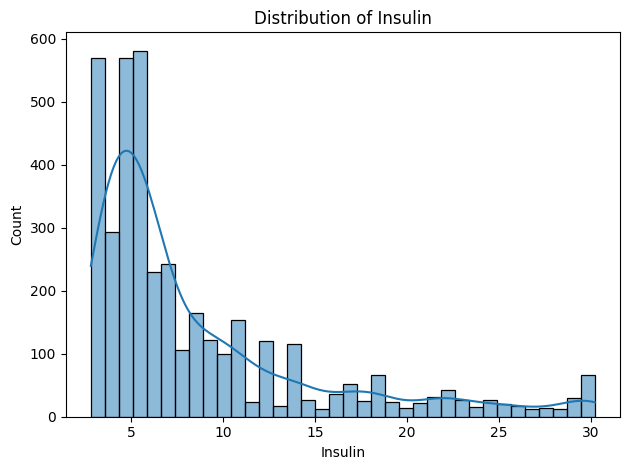

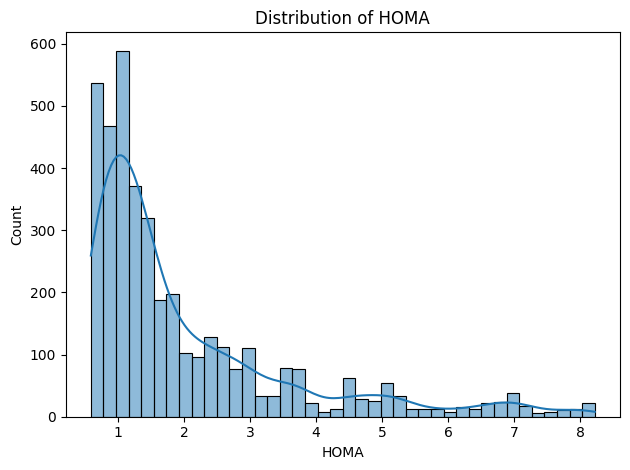

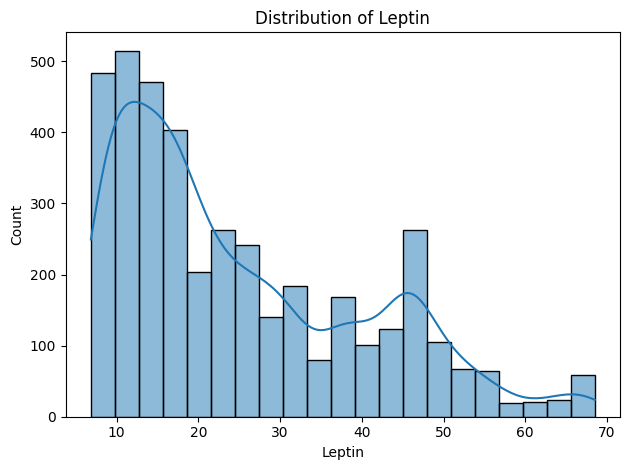

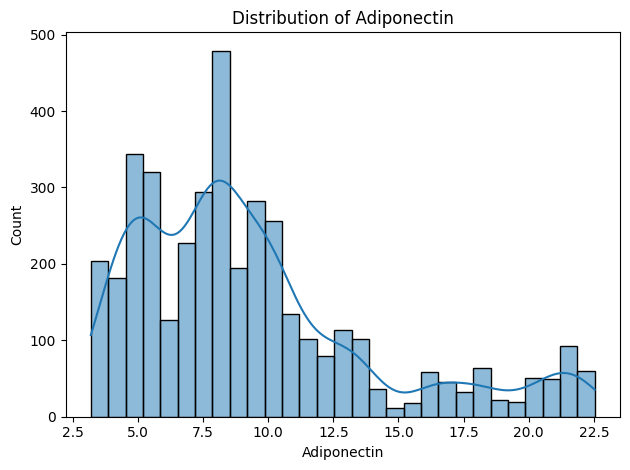

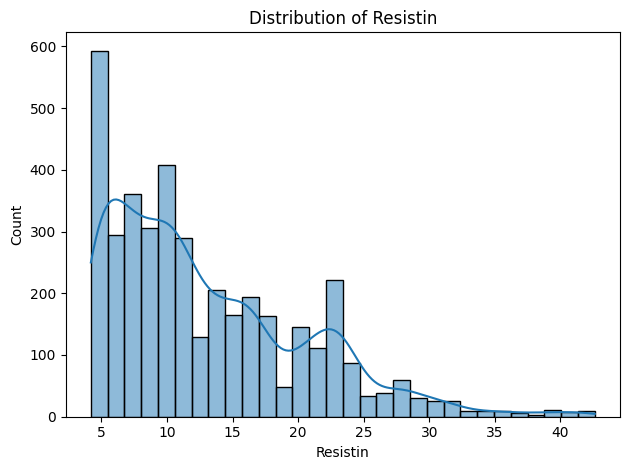

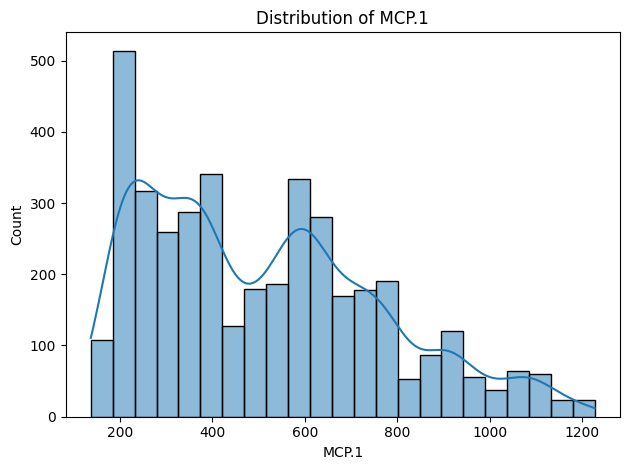

In [12]:
# Histograms/KDE (overall)
for col in feature_cols:
    fig, ax = plt.subplots()
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


##  3. Distributions by Class (Healthy vs Patient)

Overlaid histograms show how each feature differs between healthy and patient groups.

### **Key Observations**
- Most features show **substantial overlap** between classes.  
- **Insulin**, **HOMA**, and **Resistin** show slightly higher values for patients, but not strongly separated.  
- **Glucose** distributions are similar in shape for both groups.

### **Conclusion**
No single metabolic feature exhibits strong class-separation.  
This suggests the need for **multivariate** and **nonlinear** modeling strategies.


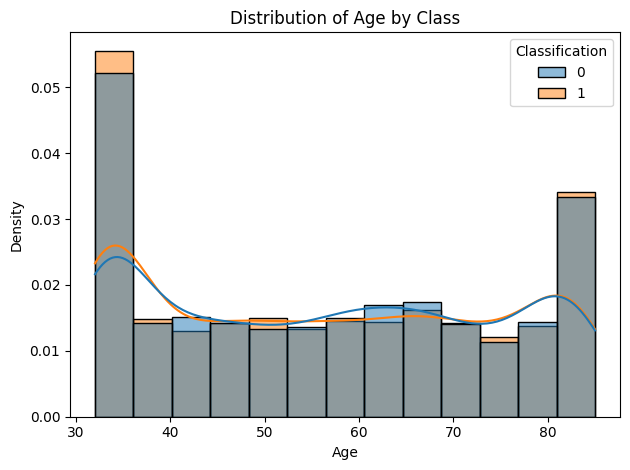

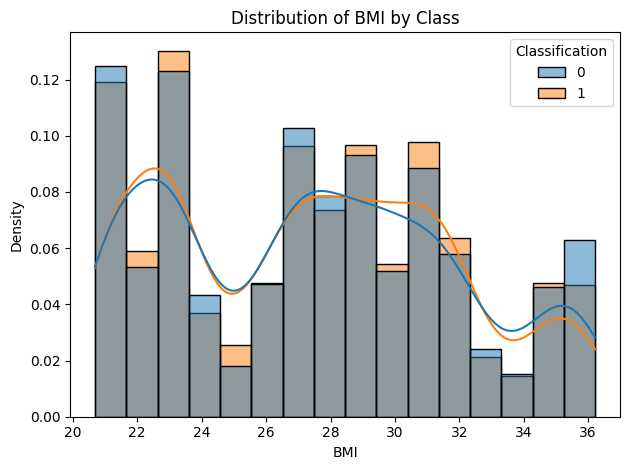

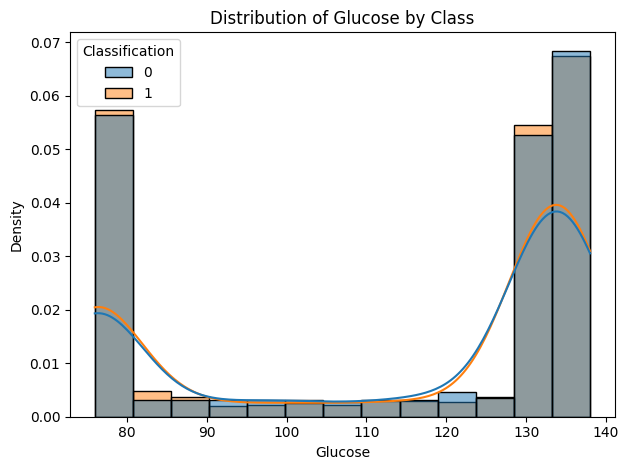

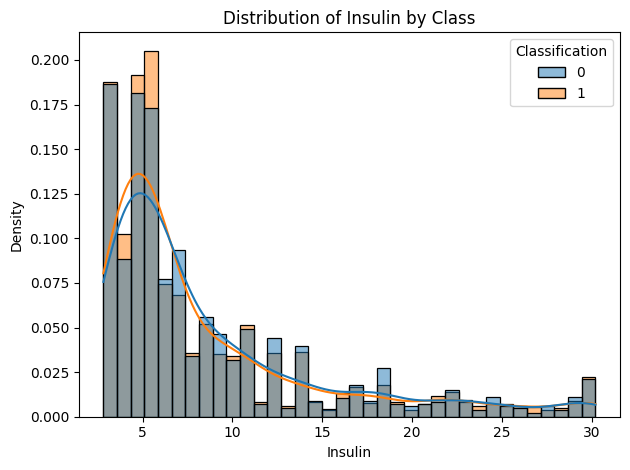

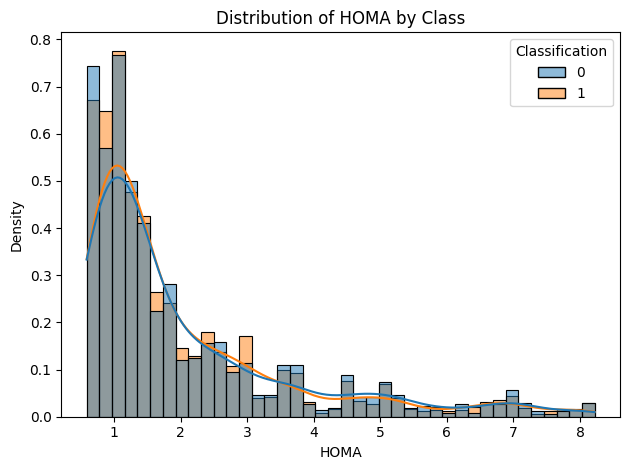

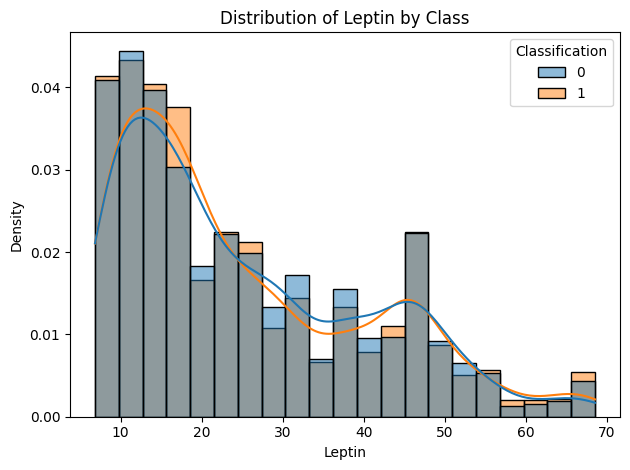

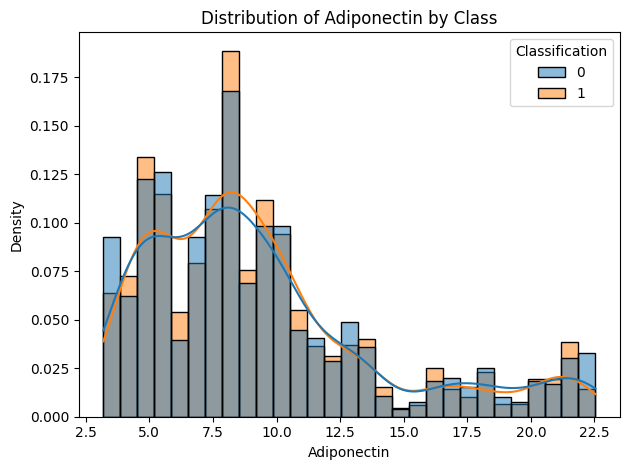

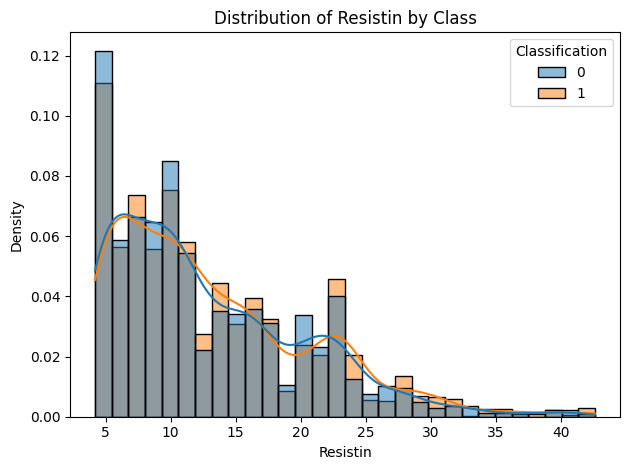

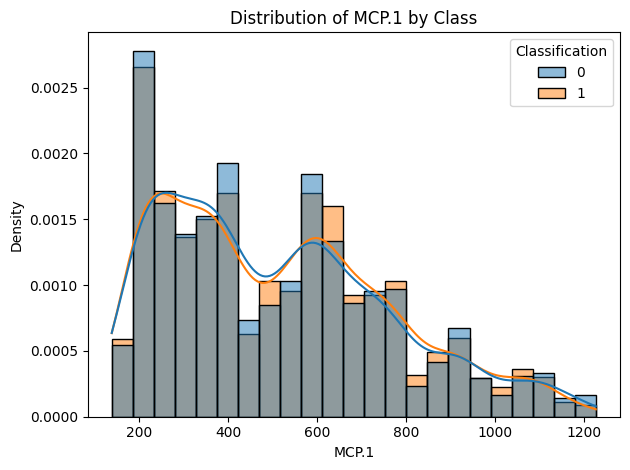

In [13]:
# Histograms by class (overlaid)
for col in feature_cols:
    fig, ax = plt.subplots()
    sns.histplot(data=df, x=col, hue=TARGET_COL, kde=True, stat="density", common_norm=False, ax=ax)
    ax.set_title(f"Distribution of {col} by Class")
    ax.set_xlabel(col)
    plt.tight_layout()
    plt.show()


##  4. Boxplots & Violin Plots by Class

Boxplots and violin plots confirm the overlapping distributions between healthy and patient groups.

### **Observations**
- Medians for all features are nearly identical between classes.  
- Significant outliers are present in:
  - **Insulin**
  - **HOMA**
  - **Resistin**
- The violin plot shapes further reinforce the lack of clear separation.

### **Interpretation**
The dataset likely contains **weak individual predictors**, requiring combined or interaction-based modeling.


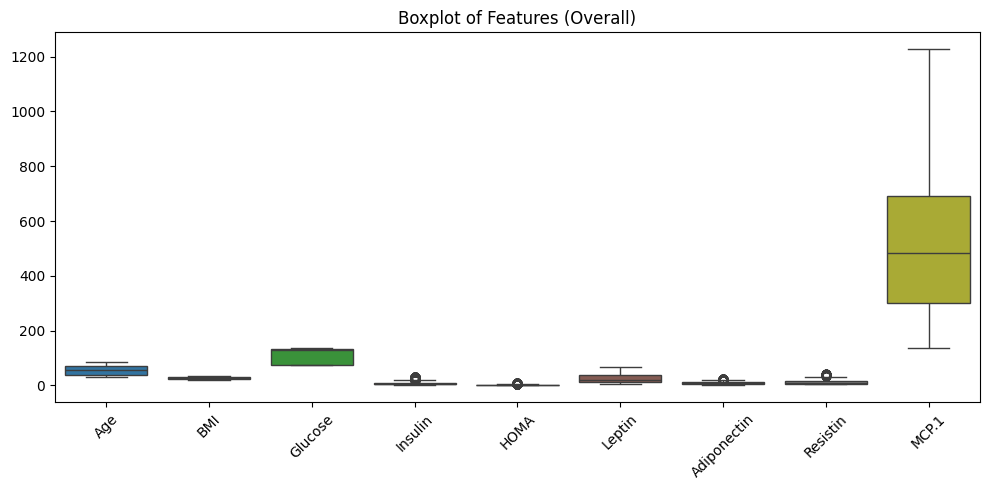

In [14]:
# Overall boxplots (not stratified by class)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[feature_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Overall)")
plt.tight_layout()
plt.show()


In [15]:
# Summary statistics per class
grouped_stats = df.groupby(TARGET_COL)[feature_cols].describe().transpose()
grouped_stats


Classification            0            1
Age   count     1784.000000  2216.000000
      mean        56.368834    56.083484
      std         17.702713    17.898252
      min         32.000000    32.000000
      25%         39.000000    38.000000
...                     ...          ...
MCP.1 min        137.488000   138.903000
      25%        300.156250   299.263750
      50%        473.118000   483.763000
      75%        679.262500   696.078500
      max       1223.677000  1227.250000

[72 rows x 2 columns]

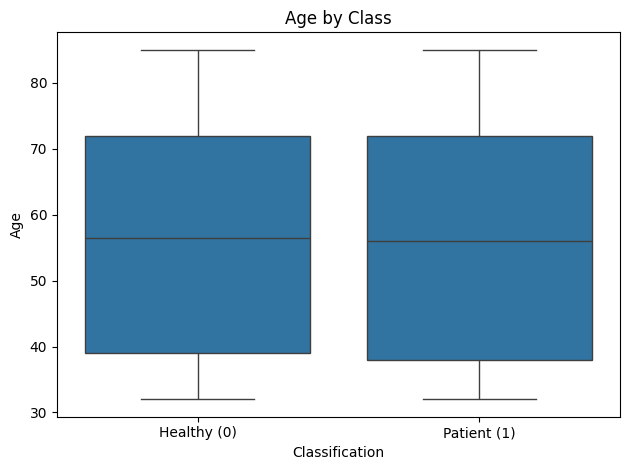

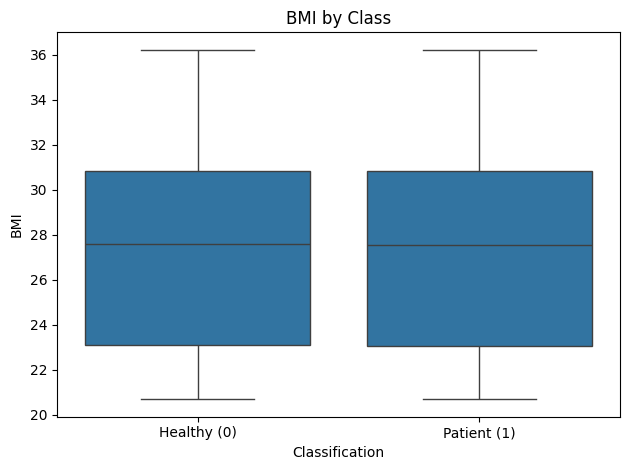

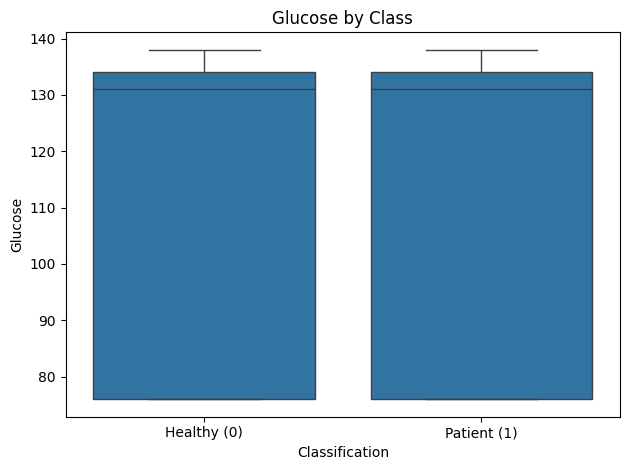

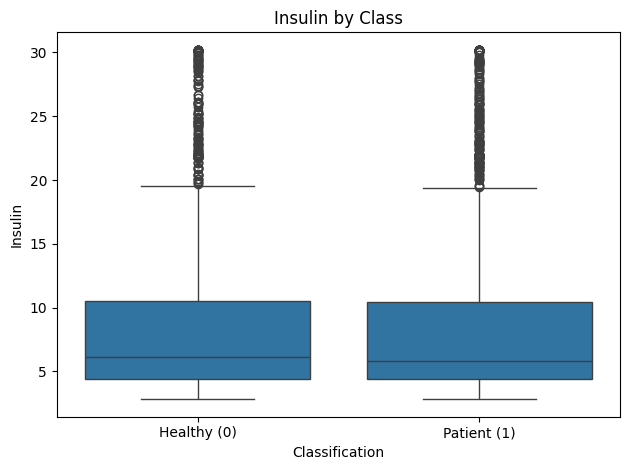

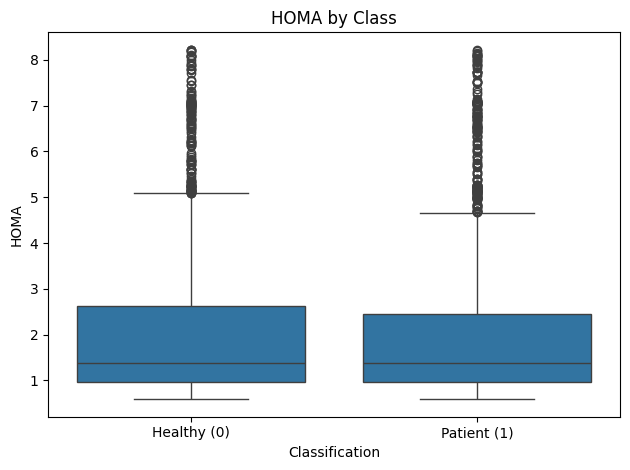

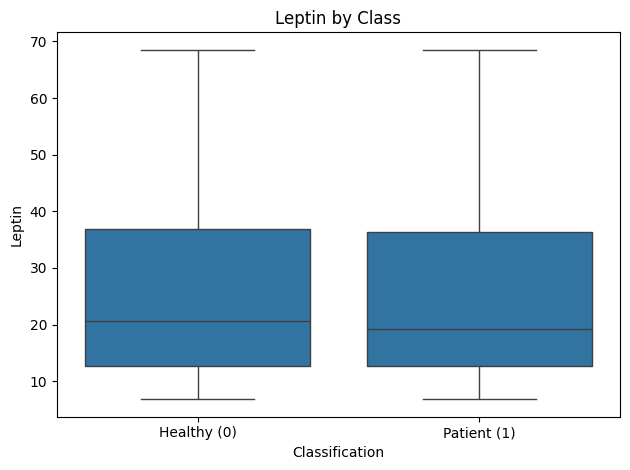

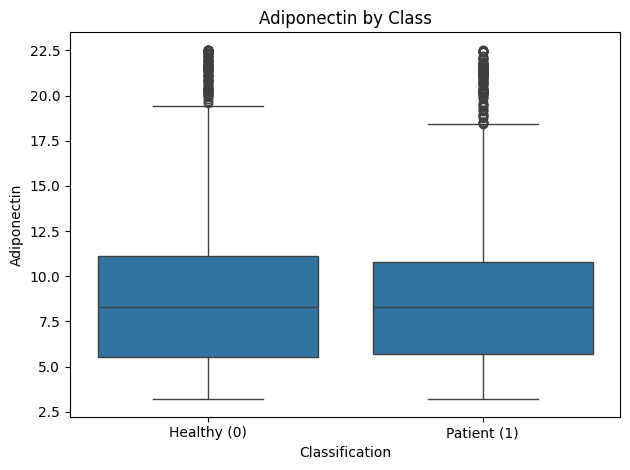

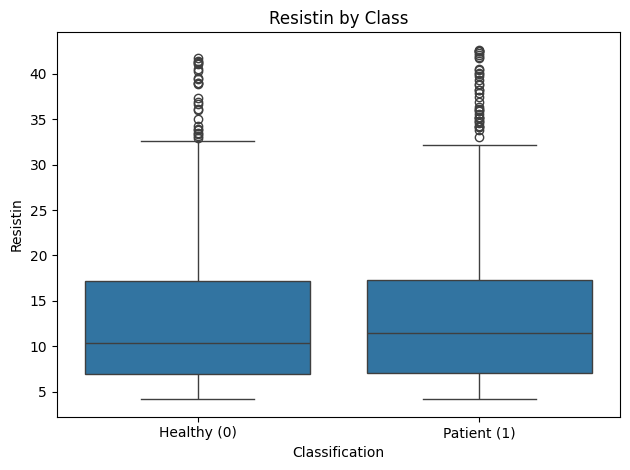

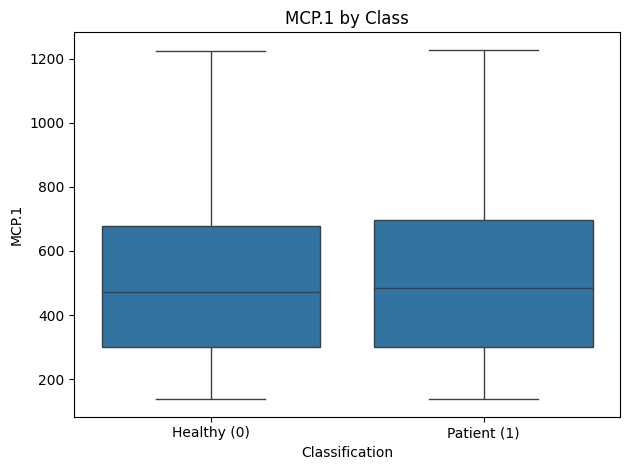

In [ ]:
for col in feature_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x=TARGET_COL, y=col, data=df, ax=ax)

    ax.set_xticks([0, 1])  
    ax.set_xticklabels(["Healthy (0)", "Patient (1)"])

    ax.set_title(f"{col} by Class")
    plt.tight_layout()
    plt.show()



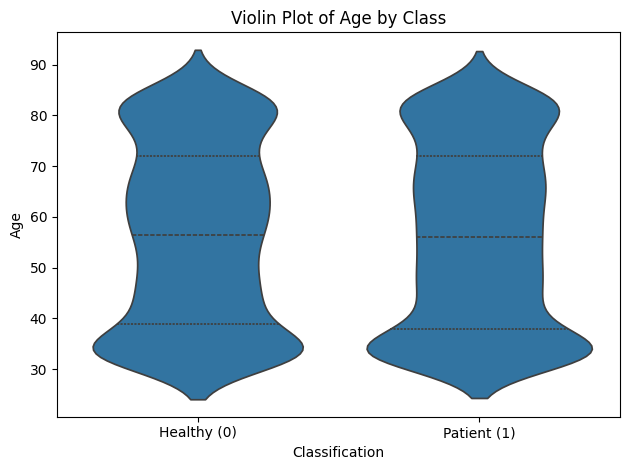

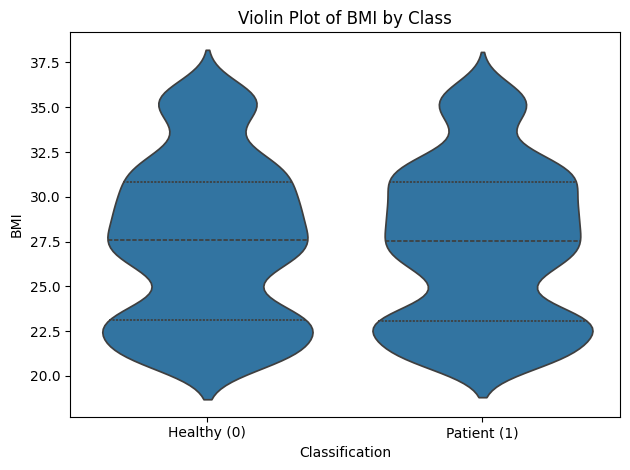

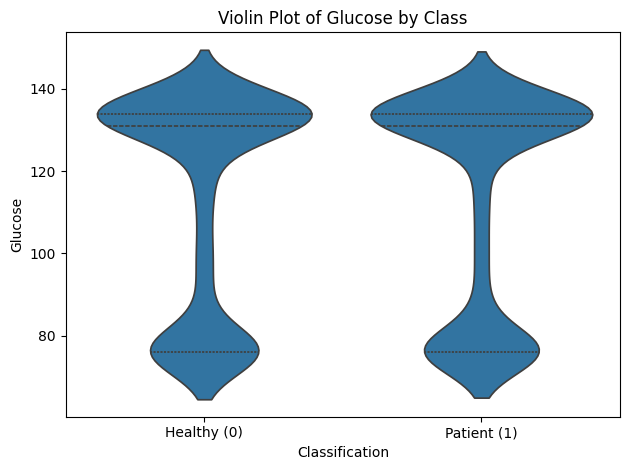

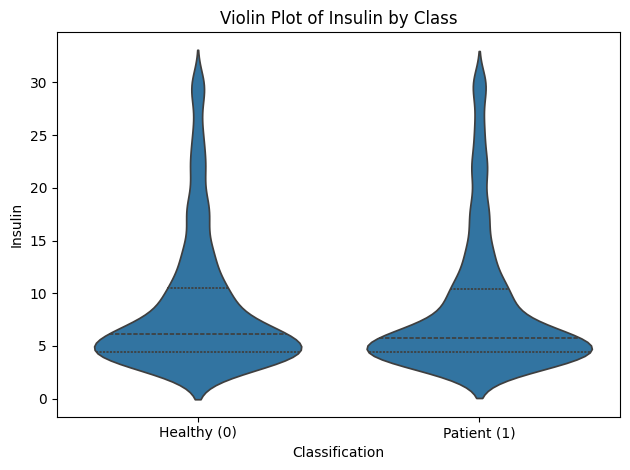

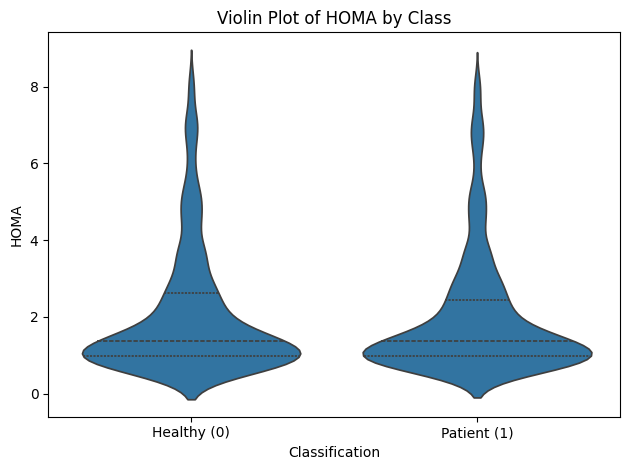

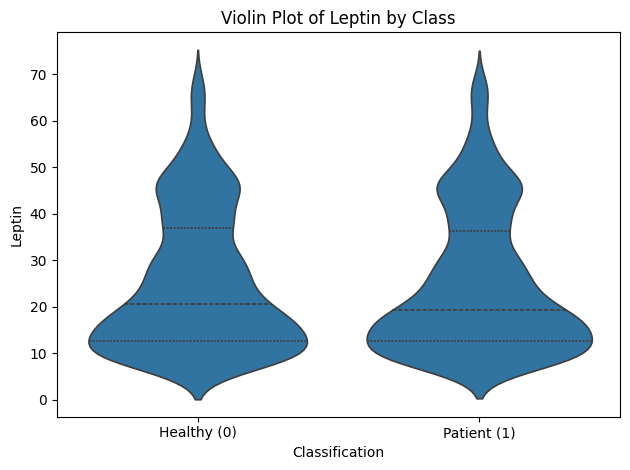

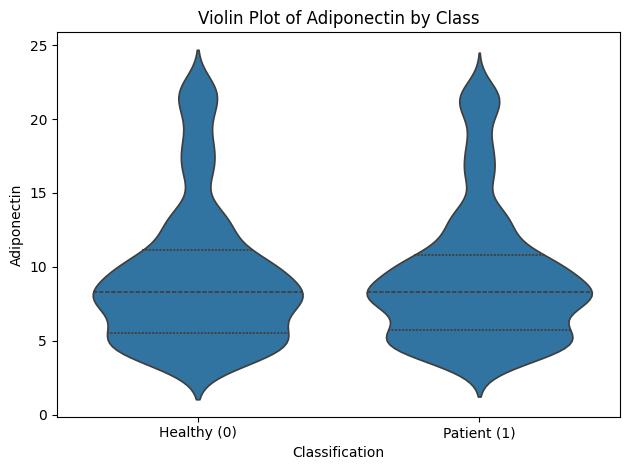

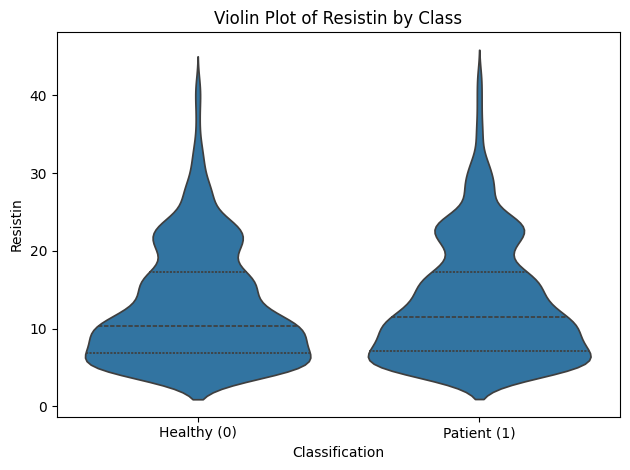

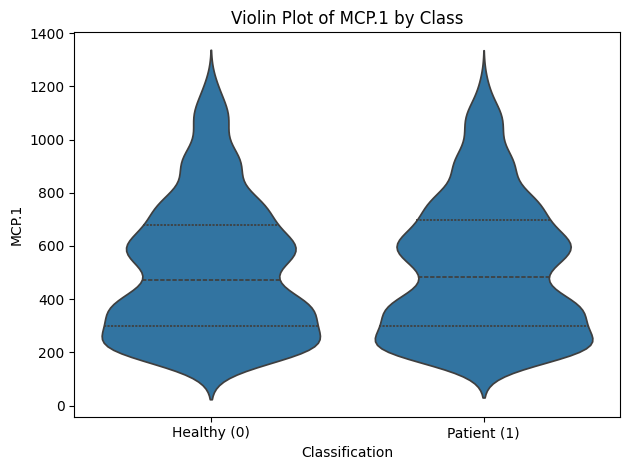

In [21]:
for col in feature_cols:
    fig, ax = plt.subplots()
    sns.violinplot(x=TARGET_COL, y=col, data=df, inner="quartile", ax=ax)
    ax.set_xticks([0, 1])  
    ax.set_xticklabels(["Healthy (0)", "Patient (1)"])
    ax.set_title(f"Violin Plot of {col} by Class")
    plt.tight_layout()
    plt.show()


##  5. Statistical Tests (t-test & Mann-Whitney U)

For each feature, both **t-tests** and **Mann-Whitney U tests** were performed.

### **Most distinguishable features (still weak):**

| Feature | Mann-Whitney p-value | Interpretation |
|---------|----------------------|----------------|
| **Insulin** | 0.074 | Weak difference; borderline significance  
| **Resistin** | 0.091 | Weak difference  
| Others | > 0.6 | No meaningful difference  

### **Conclusion**
- The dataset shows **very limited statistical separation** between classes.
- Insulin and Resistin contain minor signals but not strong enough alone.


In [22]:
results = []

for col in feature_cols:
    # Split by class
    group0 = df[df[TARGET_COL] == 0][col]
    group1 = df[df[TARGET_COL] == 1][col]
    
    # Normality check (optional, small n so not super reliable)
    # Shapiro-Wilk test
    # shapiro0 = stats.shapiro(group0)
    # shapiro1 = stats.shapiro(group1)
    
    # Here we just do both t-test and Mann-Whitney and report them.
    t_stat, t_p = stats.ttest_ind(group0, group1, equal_var=False)
    u_stat, u_p = stats.mannwhitneyu(group0, group1, alternative="two-sided")
    
    results.append({
        "feature": col,
        "t_statistic": t_stat,
        "t_pvalue": t_p,
        "mannwhitney_u": u_stat,
        "mannwhitney_pvalue": u_p,
        "mean_class0": group0.mean(),
        "mean_class1": group1.mean()
    })

stats_df = pd.DataFrame(results).set_index("feature")
stats_df.sort_values("mannwhitney_pvalue", inplace=True)
stats_df


,t_statistic,t_pvalue,mannwhitney_u,mannwhitney_pvalue,mean_class0,mean_class1
feature,,,,,,
Insulin,1.064205,0.287303,2041508.0,0.074129,8.774664,8.556861
Resistin,-1.665580,0.095878,1915307.5,0.090990,12.835733,13.229117
Age,0.504255,0.614111,1994986.5,0.613757,56.368834,56.083484
Leptin,0.311227,0.755645,1993972.0,0.633722,25.220410,25.071181
BMI,0.590046,0.555195,1992751.0,0.657865,27.468278,27.385249
MCP.1,-0.379380,0.704427,1961162.5,0.669250,510.489275,513.547364
Glucose,0.309659,0.756837,1985751.5,0.800449,114.017377,113.763087
HOMA,0.784348,0.432885,1985021.0,0.818131,2.046869,2.006189
Adiponectin,0.471932,0.637003,1969372.5,0.840666,9.403956,9.333451


In [ ]:
corr = df[feature_cols + [TARGET_COL]].corr(method="pearson")
corr

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.019139,0.002611,0.000742,0.024631,0.005058,-0.013493,-0.013438,-0.019410,-0.007965
BMI,0.019139,1.000000,-0.014469,0.011574,0.012795,-0.011482,-0.002348,0.005303,-0.023389,-0.009352
Glucose,0.002611,-0.014469,1.000000,0.000558,-0.018232,-0.006461,0.016363,0.014179,0.001837,-0.004893
Insulin,0.000742,0.011574,0.000558,1.000000,-0.013142,0.005678,-0.014560,0.036136,-0.011382,-0.016826
HOMA,0.024631,0.012795,-0.018232,-0.013142,1.000000,0.006751,0.003433,0.000272,0.009965,-0.012441
Leptin,0.005058,-0.011482,-0.006461,0.005678,0.006751,1.000000,0.024054,0.014217,-0.003359,-0.004914
Adiponectin,-0.013493,-0.002348,0.016363,-0.014560,0.003433,0.024054,1.000000,-0.018945,-0.018323,-0.007499
Resistin,-0.013438,0.005303,0.014179,0.036136,0.000272,0.014217,-0.018945,1.000000,-0.007602,0.026235
MCP.1,-0.019410,-0.023389,0.001837,-0.011382,0.009965,-0.003359,-0.018323,-0.007602,1.000000,0.006002
Classification,-0.007965,-0.009352,-0.004893,-0.016826,-0.012441,-0.004914,-0.007499,0.026235,0.006002,1.000000


##  6. Correlation Analysis

A Pearson correlation matrix and heatmap were generated.

### **Key Findings**
- **All correlations are extremely low** (|r| < 0.03 in most cases).  
- No meaningful linear relationships exist between features.  
- Correlation between each feature and `Classification` is close to zero.

### **Interpretation**
The dataset lacks linear structure.  
Effective models must capture **nonlinear** relationships or feature interactions.


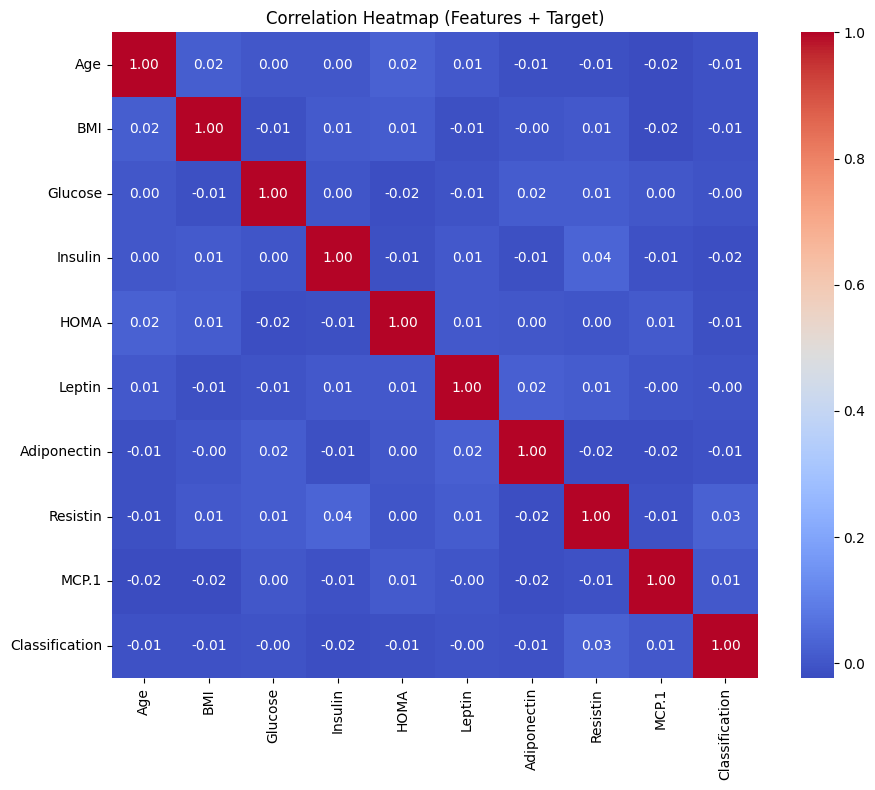

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Features + Target)")
plt.tight_layout()
plt.show()


## 7. Outlier Detection

Z-score analysis flagged outliers using the threshold |z| > 3:

| Feature | Outlier Count |
|--------|----------------|
| **Insulin** | 110 |
| **HOMA** | 112 |
| **Resistin** | 43 |
| Others | 0 |

### **Interpretation**
Outliers are concentrated in metabolic markers, which commonly display high biological variability.  
Given the dataset size, retaining them is reasonable, but scaling becomes crucial.


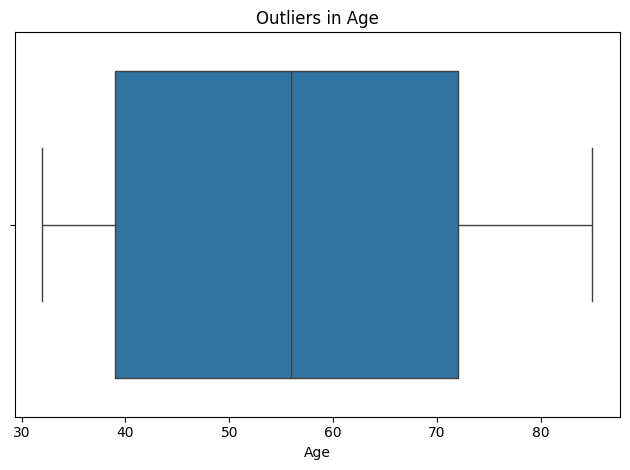

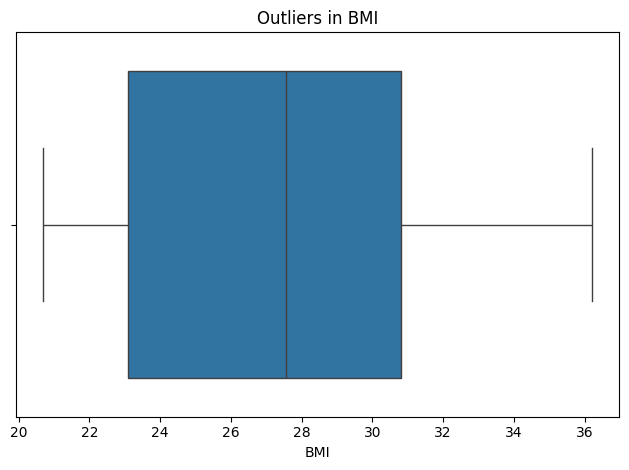

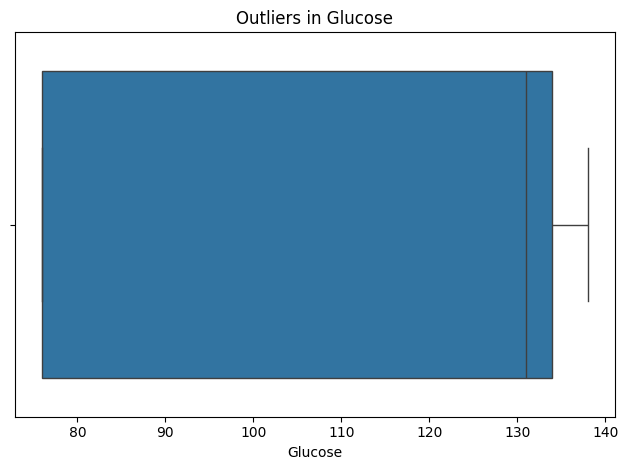

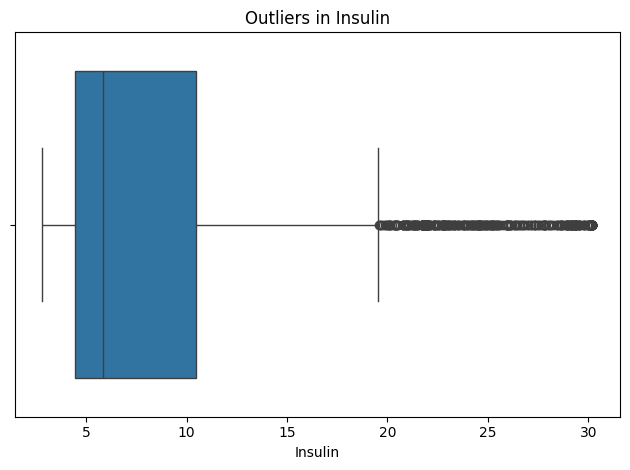

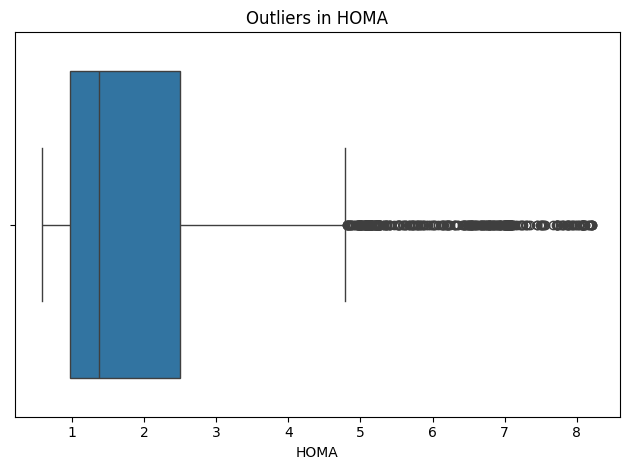

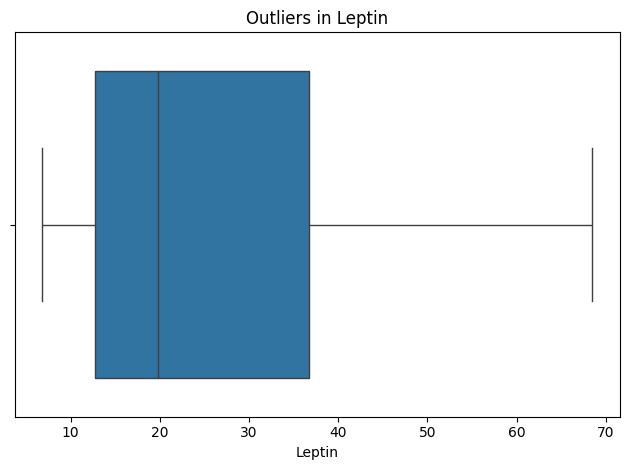

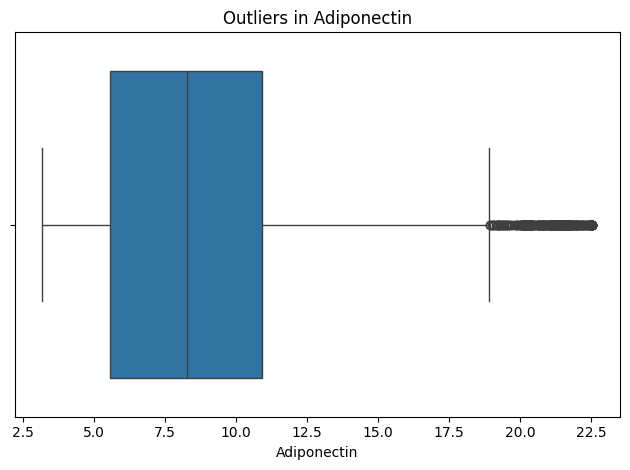

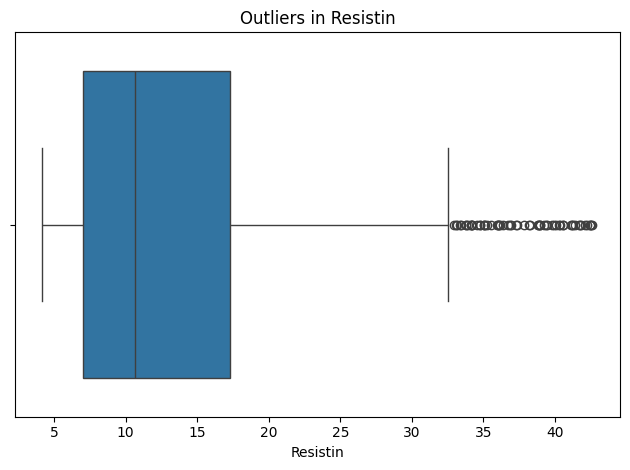

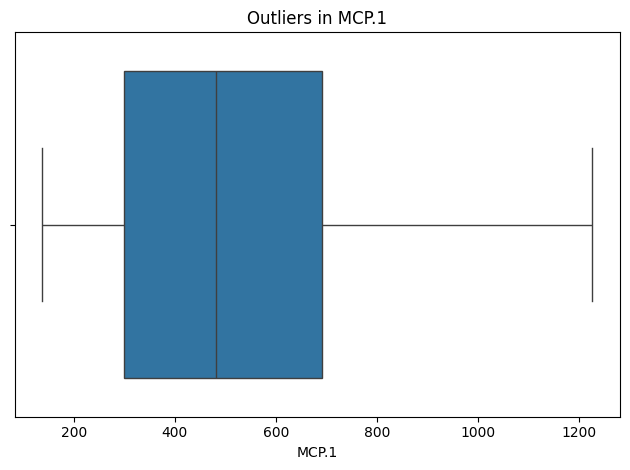

In [ ]:

for col in feature_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Outliers in {col}")
    plt.tight_layout()
    plt.show()


In [26]:
z_scores = np.abs(stats.zscore(df[feature_cols]))
z_df = pd.DataFrame(z_scores, columns=feature_cols)

# Consider |z| > 3 as outlier
outlier_mask = z_df > 3
outlier_counts = outlier_mask.sum()

print("Outlier counts per feature (|z| > 3):")
outlier_counts


Outlier counts per feature (|z| > 3):


Age              0
BMI              0
Glucose          0
Insulin        110
HOMA           112
Leptin           0
Adiponectin      0
Resistin        43
MCP.1            0
dtype: int64

## 8. Scaling Effects

StandardScaler was applied to all numerical features.

### **Results**
- All features successfully standardized to ~0 mean and unit variance.
- Skewed features remain skewed (scaling does not normalize distribution).

### **Why scaling matters**
Essential for algorithms such as:
- Logistic Regression  
- SVM  
- kNN  
- Neural Networks  

Particularly important because the Coimbra dataset contains **wide variance differences** across metabolic markers.


In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])
scaled_df = pd.DataFrame(scaled_features, columns=feature_cols)

print("Original feature summary:")
display(df[feature_cols].describe().T)

print("\nScaled feature summary (mean ~0, std ~1):")
display(scaled_df.describe().T)


Original feature summary:


,count,mean,std,min,25%,50%,75%,max
Age,4000.0,56.210750,17.809650,32.000000,39.000000,56.000000,72.000000,85.000000
BMI,4000.0,27.422280,4.413884,20.690751,23.079053,27.558485,30.814916,36.209606
Glucose,4000.0,113.876500,25.837795,76.000000,76.000000,131.000000,134.000000,138.000000
Insulin,4000.0,8.654001,6.435160,2.821000,4.421750,5.818000,10.466250,30.211000
HOMA,4000.0,2.024332,1.625638,0.590033,0.970090,1.373842,2.502776,8.218456
Leptin,4000.0,25.137737,15.096446,6.831900,12.712750,19.805050,36.670250,68.506600
Adiponectin,4000.0,9.364896,4.674244,3.192272,5.580210,8.286938,10.918292,22.536919
Resistin,4000.0,13.053667,7.454424,4.190320,7.022095,10.692780,17.294747,42.617810
MCP.1,4000.0,512.183456,253.279015,137.488000,299.665000,482.308000,691.312500,1227.250000



Scaled feature summary (mean ~0, std ~1):


,count,mean,std,min,25%,50%,75%,max
Age,4000.0,1.523226e-16,1.000125,-1.359587,-0.966493,-0.011835,0.886667,1.616699
BMI,4000.0,-3.144152e-16,1.000125,-1.525271,-0.984115,0.030862,0.768724,1.991087
Glucose,4000.0,2.664535e-16,1.000125,-1.466117,-1.466117,0.662814,0.778937,0.933768
Insulin,4000.0,-1.509903e-16,1.000125,-0.906540,-0.657758,-0.440759,0.281652,3.350297
HOMA,4000.0,6.572520e-17,1.000125,-0.882410,-0.648591,-0.400194,0.294348,3.810749
Leptin,4000.0,3.197442e-17,1.000125,-1.212744,-0.823143,-0.353285,0.764018,2.873145
Adiponectin,4000.0,1.616485e-16,1.000125,-1.320726,-0.809791,-0.230645,0.332373,2.818353
Resistin,4000.0,-6.394885e-17,1.000125,-1.189154,-0.809228,-0.316749,0.569006,3.966482
MCP.1,4000.0,3.126388e-16,1.000125,-1.479563,-0.839173,-0.117969,0.707328,2.823589


## 9. Feature Importance (Mutual Information & ANOVA F-test)

### **Mutual Information Rankings**
1. **HOMA** (0.017)  
2. **Resistin** (0.006)  
3. **Glucose** (0.004)  
4. **Adiponectin** (0.003)  
5. Others: 0.0

### **ANOVA F-test Rankings**
- **Resistin**: F = 2.75, p ≈ 0.097  
- Insulin: F ≈ 1.13  
- Others: F < 1  

### **Interpretation**
- No feature demonstrates strong predictive value individually.  
- HOMA and Resistin contain the most information, but signals are weak.  
- Models must rely on **feature combinations** and **nonlinear effects**.


In [28]:
X = df[feature_cols].values
y = df[TARGET_COL].values

mi = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": feature_cols,
    "mutual_information": mi
}).sort_values("mutual_information", ascending=False).set_index("feature")

mi_df


,mutual_information
feature,
HOMA,0.017155
Resistin,0.006323
Glucose,0.004276
Adiponectin,0.003197
Age,0.000000
BMI,0.000000
Insulin,0.000000
Leptin,0.000000
MCP.1,0.000000


In [29]:
f_vals, f_pvals = f_classif(X, y)

f_df = pd.DataFrame({
    "feature": feature_cols,
    "f_value": f_vals,
    "p_value": f_pvals
}).sort_values("f_value", ascending=False).set_index("feature")

f_df


,f_value,p_value
feature,,
Resistin,2.753596,0.097114
Insulin,1.132220,0.287367
HOMA,0.618858,0.431519
BMI,0.349664,0.554337
Age,0.253670,0.614530
Adiponectin,0.224822,0.635416
MCP.1,0.144050,0.704308
Leptin,0.096552,0.756023
Glucose,0.095709,0.757057


#  Final Summary

### Key Findings
1.  Feature distributions show strong skewness in Insulin, HOMA, Resistin.  
2.  Healthy vs Patient groups have heavily overlapping distributions.  
3.  Statistical tests show weak class separation.  
4.  Correlations are extremely low across all feature pairs.  
5.  Outliers exist mainly in metabolic markers.  
6.  Scaling is required due to differing magnitude ranges.  
7.  Feature importance scores are very small, indicating weak individual predictors.

### **Overall Conclusion**
The Coimbra dataset does **not** contain strong linear signals in single features.  
Successful classification will require:
- Nonlinear models (Random Forest, Gradient Boosting, SVM RBF)  
- Use of interaction terms  
- Combined feature effects  
- Robust preprocessing and scaling  

This dataset is best modeled using **multivariate, nonlinear techniques** rather than relying on any one biomarker alone.
